### import libraries

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(str('/home/alexandre/Documents/Projects'))

from slmOptim.patternSLM import patterns as pt
from slmOptim.optimization import phase_conjugation
from slmOptim.zeluxPy import helper_functions as cam
from slmOptim.optimization.init_experiment import InitExperiment
from slmOptim.optimization.iteration_algorithms import ContinuousSequential
from slmOptim.optimization.iteration_algorithms import StepwiseSequential

from slmOptim.optimization import cost_functions

### set experiment parameters

In [4]:
# SLM resolution
resX, resY = (800, 600)

# the number of controlled segments on the SLM
slm_segments = 256

# size of macropixels on slm
slm_macropixels = 5

phase_steps = 16

# Define observation window on camera
roi_size = 800
off = (0, 0)

# Define camera macropixel, this is defined by the measured speckel grain
bins = 1

# Define camera acquisition parameters
exposure_time = 100
gain = 1
timeout= 100

# save data
path = '/home/optomeca/Documents/measurements'

### Initialize SLM and cam and do some checks

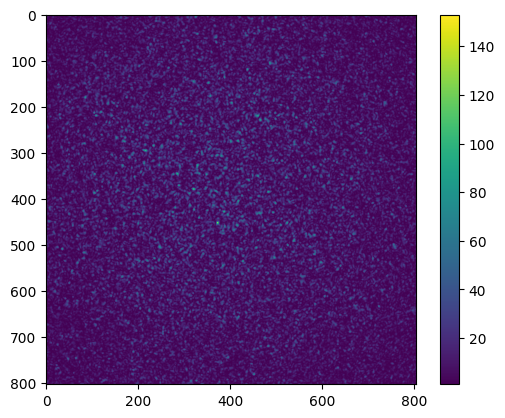

In [6]:
init = InitExperiment(roi_size, off, bins, exposure_time, gain, timeout)
camera = init.init_cam()
# slm = init.init_slm()

frame = camera.get_pending_frame_or_null()
frame = np.copy(frame.image_buffer)
plt.imshow(frame)
plt.colorbar()
# init.close_cam()

# print(frame.shape)

In [5]:
init.close_cam()

### define cost function

In [7]:
# define target for the correlation cost function only
target_shape = (104, 104)
tgt = phase_conjugation.Target(target_shape)
target = tgt.square((4, 4), offset_x=0, offset_y=0, intensity=100)

# choose one cost function to pass to optim object    
cost_fun = lambda x: cost_functions.corr_coef(x, target)
cost_fun = lambda x: cost_functions.snr(x)


##### Load patterns that will be used for optimization using a custom pattern loader

#### load patterns and run the algorithm

32 5


In [33]:
slm_segments = [16, 64, 256, 1024, 4096]
slm_macropixels = [7, 6, 5, 4, 3]

for seg, macro in zip(slm_segments, slm_macropixels):
    
    # create pattenr loader
    pattern_loader = pt.OnePixelPatternGenerator(seg)
    # instantiate optimization class
    optim = ContinuousSequential(slm, camera, 
                            pattern_loader, 
                            total_iterations=1,
                            slm_segments=seg,
                            slm_macropixel=macro,
                            phase_steps=8, 
                            save_path=path)

    # pass cost function to object
    optim.register_callback(cost_fun)

    # run the algorithm
    pattern, cost, frames = optim.run()
    optim.save_raw()


    patternSLM = pt.Pattern(resX, resY)

    mask = patternSLM._enlarge_pattern(pattern, macro)
    mask = patternSLM.add_subpattern(mask)

    slm.sendArray(mask)
    # slm.updateArray(temp)

    frame = camera.get_pending_frame_or_null()
    focus = np.copy(frame.image_buffer)

    optim.plot(focus, 400)

  0%|          | 0/16 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

  0%|          | 0/64 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

  0%|          | 0/256 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

### Apply optimized mask and get frame

Data transmitted


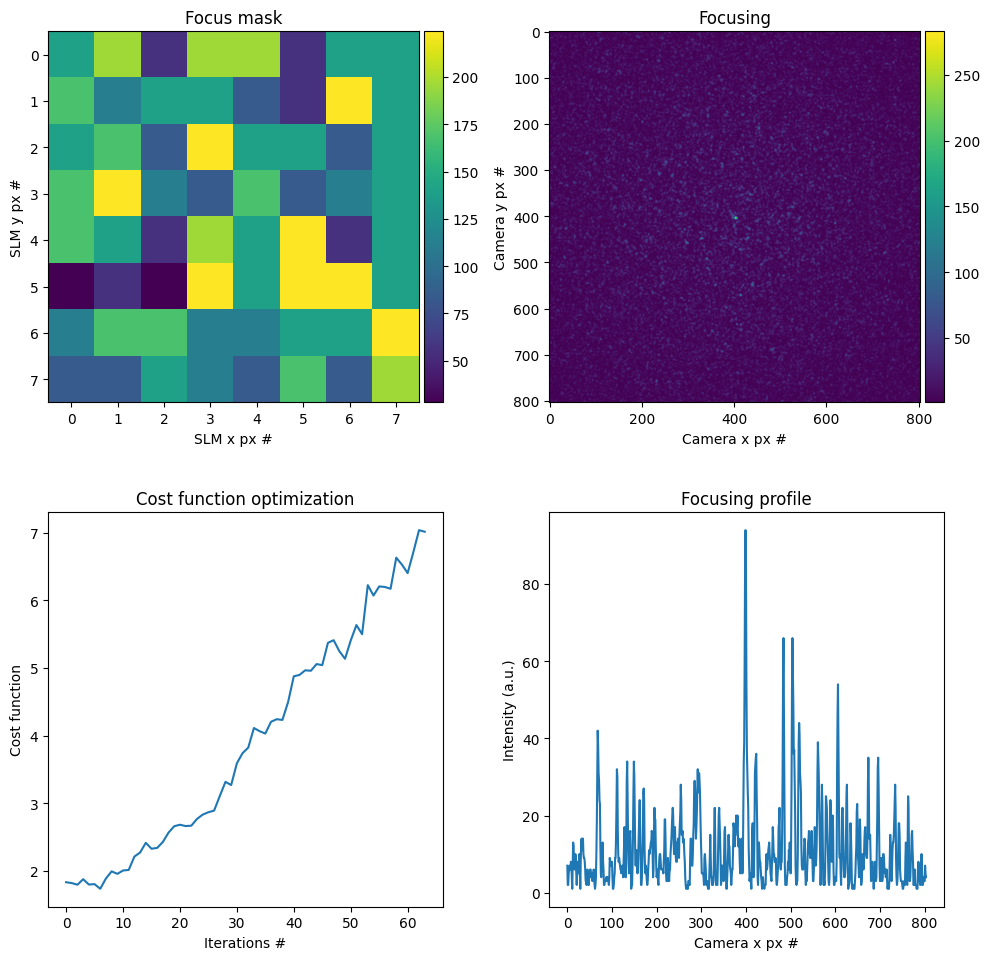

In [25]:
patternSLM = pt.Pattern(resX, resY)



mask = patternSLM._enlarge_pattern(pattern, slm_macropixels)
mask = patternSLM.add_subpattern(mask)

slm.sendArray(mask)
# slm.updateArray(temp)

frame = camera.get_pending_frame_or_null()
focus = np.copy(frame.image_buffer)

optim.plot(focus, 400)

In [ ]:
patternSLM = pt.Pattern(resX, resY)

best_pattern = pattern

mask = patternSLM._enlarge_pattern(pattern, slm_macropixels)
mask = patternSLM.add_subpattern(mask)

slm.sendArray(mask)
# slm.updateArray(temp)

frame = camera.get_pending_frame_or_null()
focus = np.copy(frame.image_buffer)

optim.plot(focus, 500)

In [45]:
optim.save_raw()

AttributeError: 'ContinuousSequential' object has no attribute 'save'

In [ ]:
init.close_cam()
# init.close_slm()

In [ ]:
pat = pt.Pattern(resX, resY)
mirror = pat.mirror()
slm.sendArray(mirror)

In [ ]:
had = pt.HadamardPatternGenerator(256)
pattern = had[65]
patternSLM = pt.Pattern(resX, resY)

mask = patternSLM._enlarge_pattern(pattern, 5)
mask = patternSLM.add_subpattern(mask)

slm.sendArray(mask)


In [ ]:
frame = camera.get_pending_frame_or_null()
focus = np.copy(frame.image_buffer)
plt.imshow(focus[300:400, 300:400])
plt.colorbar()
plt.xlabel("Camera x px #")
plt.ylabel("Camera y px #")
# plt.savefig("continuous_sequential_no_mask.png", dpi=400, transparent=True)

In [ ]:
frames = {}

In [ ]:
idx = 10
frame = camera.get_pending_frame_or_null()
frame = np.copy(frame.image_buffer)
plt.imshow(frame[190:210, 190:210])
plt.colorbar()

frames[idx] = frame

In [ ]:
for spot in frames.values():
    plt.figure()
    plt.imshow(spot[190:210, 190:210])


In [ ]:
for spot in frames.values():
    plt.plot(spot[190:210, 190:210][10])

In [ ]:
for idx in range(3, 7):
    plt.plot(frames[idx][190:210, 190:210][10])


In [15]:
optim_frame_x = {}
counter = 0

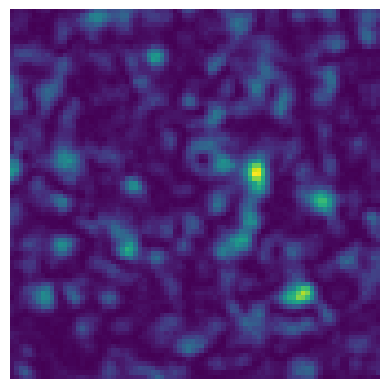

In [32]:
counter += 1
frame = camera.get_pending_frame_or_null()
optim_frame_x[counter] = np.copy(frame.image_buffer)
plt.imshow(optim_frame_x[counter])
plt.axis('off')

plt.savefig("optimized_spot" + str(counter) + ".png", bbox_inches='tight')


In [ ]:
for idx in range(3, 7):
    plt.plot(frames[idx][190:210, 190:210][10])

In [ ]:
for spot in frames_v.values():
    plt.figure()
    plt.imshow(spot[190:210, 190:210])

In [33]:
import pickle
with open('opti_spot_vs_x_fine.pkl', 'wb') as fp:
    pickle.dump((optim_frame_x), fp)